In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '2024_03_25_-_epfl_fin413_crypto_portfolio_construction_-_project_dataset.csv'
# Adjust the code to load the data while addressing the header
data = pd.read_csv(file_path, header=1)

# Parse the 'time' column to datetime if it's not already in that format
data['time'] = pd.to_datetime(data['time'], errors='coerce')

# Convert all other columns to numeric values, assuming they represent returns
for col in data.columns[1:]:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Check the first few rows and data structure again after adjustments
data_head = data.head()
data_info = data.info()

data_head, data_info



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2357 entries, 0 to 2356
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    2357 non-null   datetime64[ns]
 1   ADA     2357 non-null   float64       
 2   BCH     2357 non-null   float64       
 3   BTC     2357 non-null   float64       
 4   DOGE    2357 non-null   float64       
 5   ETH     2357 non-null   float64       
 6   LINK    2357 non-null   float64       
 7   LTC     2357 non-null   float64       
 8   MANA    2357 non-null   float64       
 9   XLM     2357 non-null   float64       
 10  XRP     2357 non-null   float64       
 11  SPXT    2357 non-null   float64       
 12  XCMP    2357 non-null   float64       
 13  USSOC   2357 non-null   float64       
 14  VIX     2357 non-null   float64       
dtypes: datetime64[ns](1), float64(14)
memory usage: 276.3 KB


(        time       ADA       BCH       BTC      DOGE       ETH      LINK  \
 0 2017-10-02  0.027392  0.008261 -0.000402 -0.023234 -0.023491 -0.181214   
 1 2017-10-03 -0.194745 -0.042087 -0.019799 -0.026641 -0.016846 -0.033296   
 2 2017-10-04  0.050384 -0.115200 -0.022141 -0.008798 -0.000445  0.134588   
 3 2017-10-05 -0.016903 -0.004159  0.024363 -0.006903  0.011348  0.033163   
 4 2017-10-06 -0.140799  0.025370  0.011686  0.016882  0.045222  0.155556   
 
         LTC      MANA       XLM       XRP     SPXT     XCMP    USSOC      VIX  
 0 -0.027555 -0.203082 -0.062725 -0.024964  0.00388  0.00320  0.00168 -0.00631  
 1 -0.021392  0.166436 -0.045385  0.000985  0.00220  0.00238  0.00126  0.00635  
 2 -0.017833 -0.144464 -0.048348  0.050172  0.00131  0.00060  0.00501  0.01262  
 3  0.008200 -0.063668  0.226926  0.114754  0.00582  0.00778  0.00624 -0.04569  
 4  0.008521 -0.398374  0.268461 -0.019328 -0.00076  0.00075  0.00413  0.05005  ,
 None)

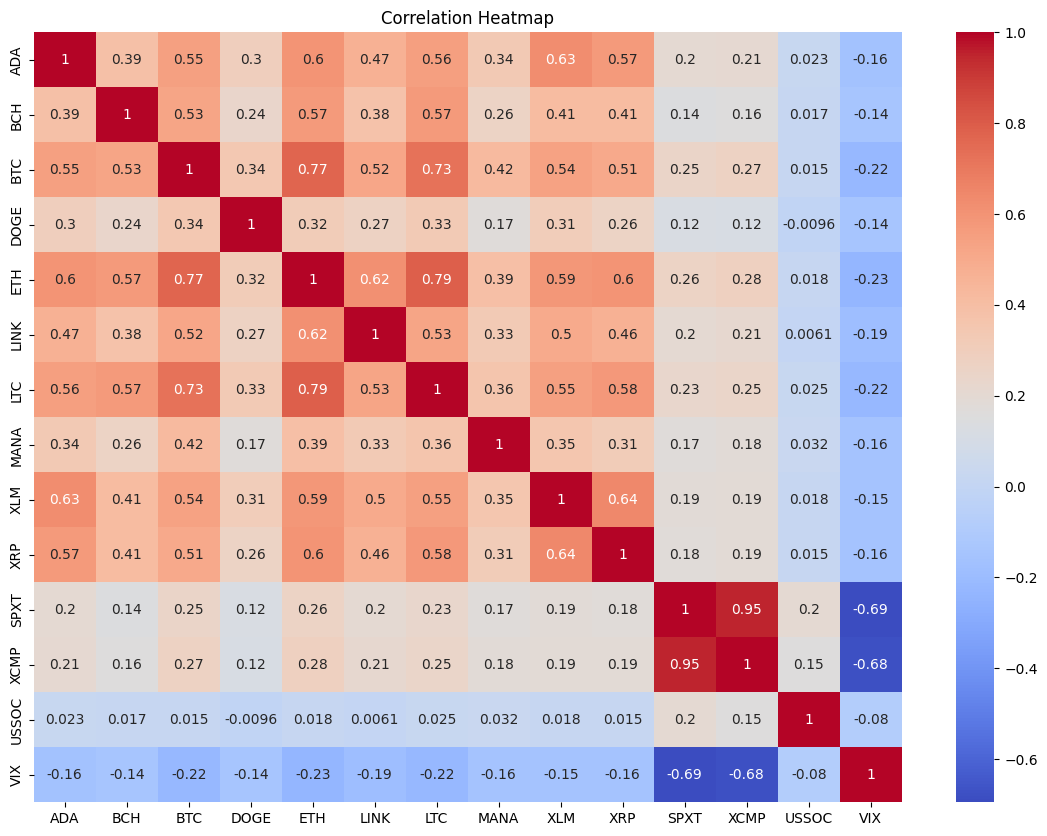

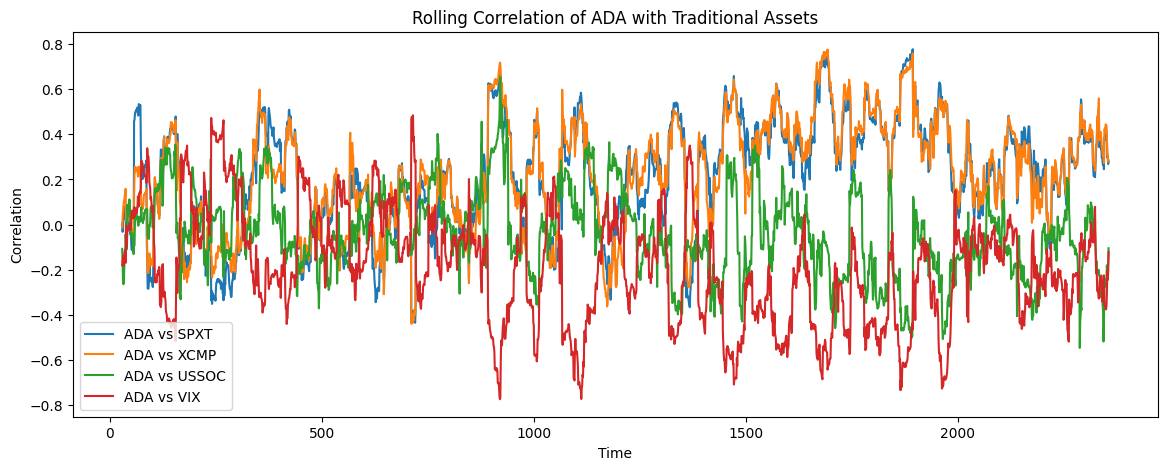

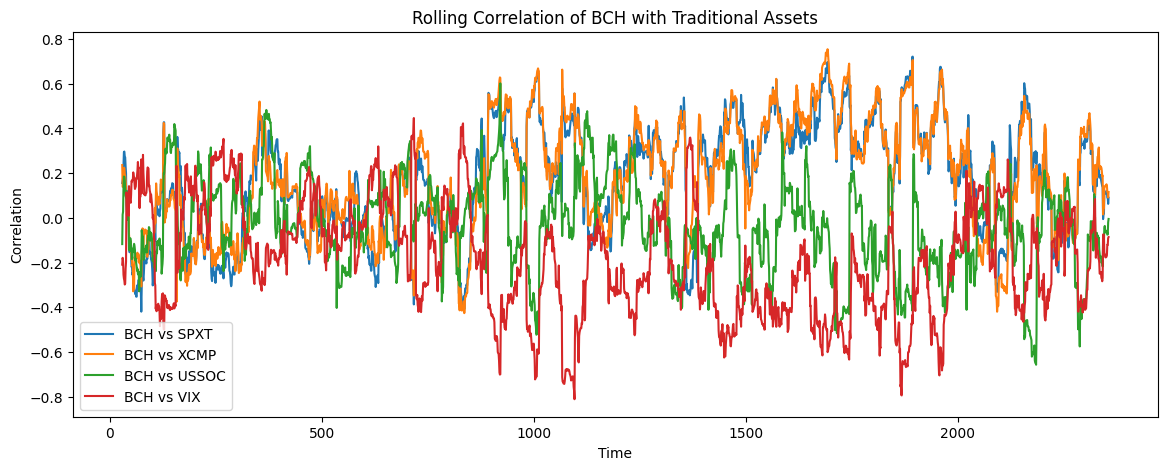

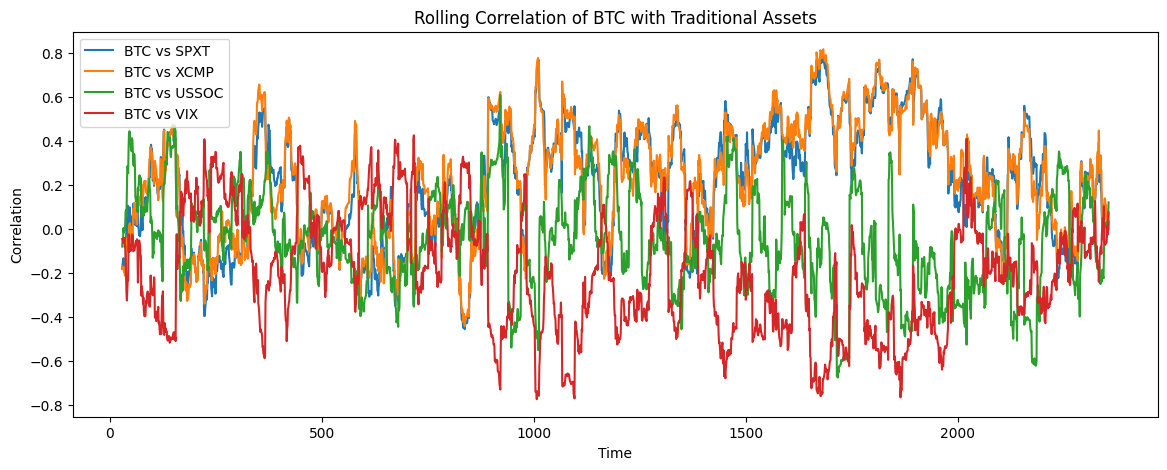

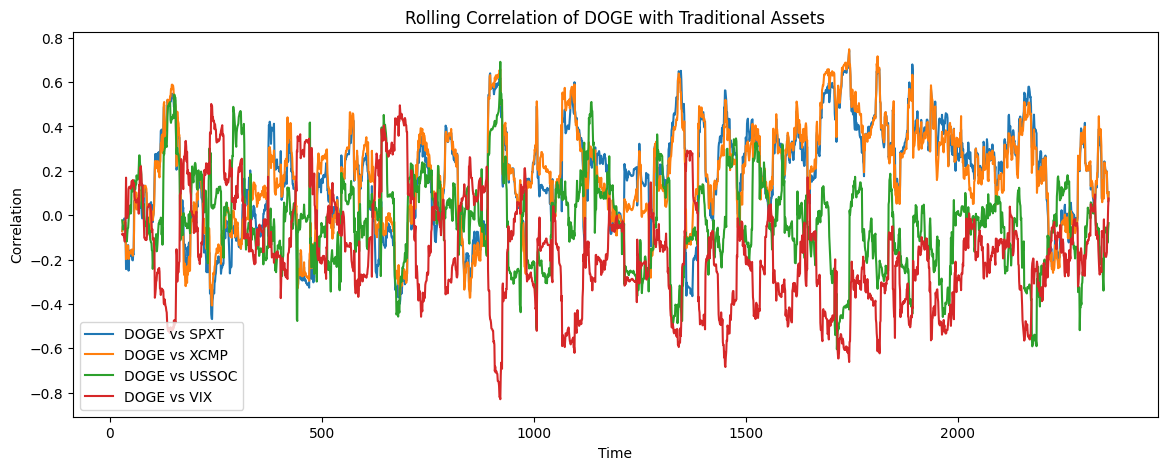

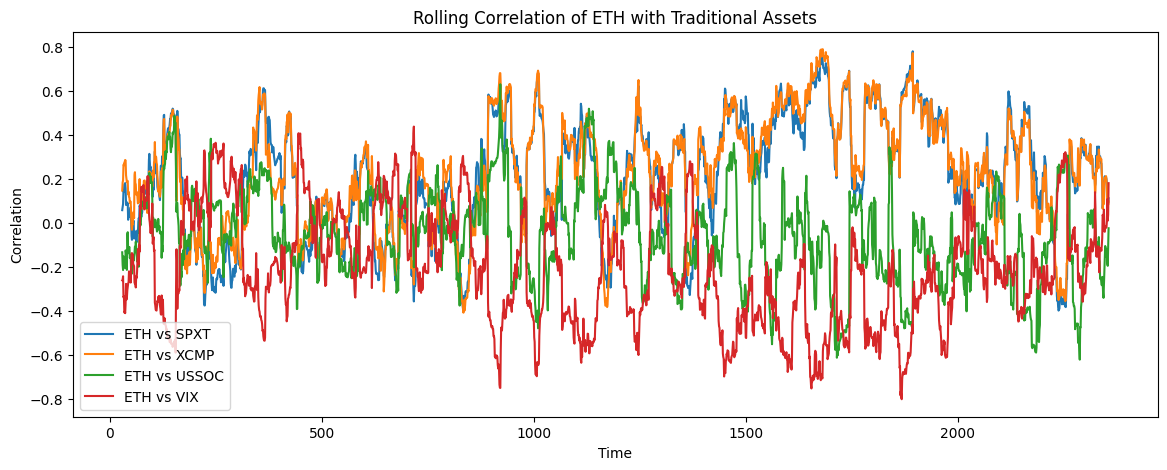

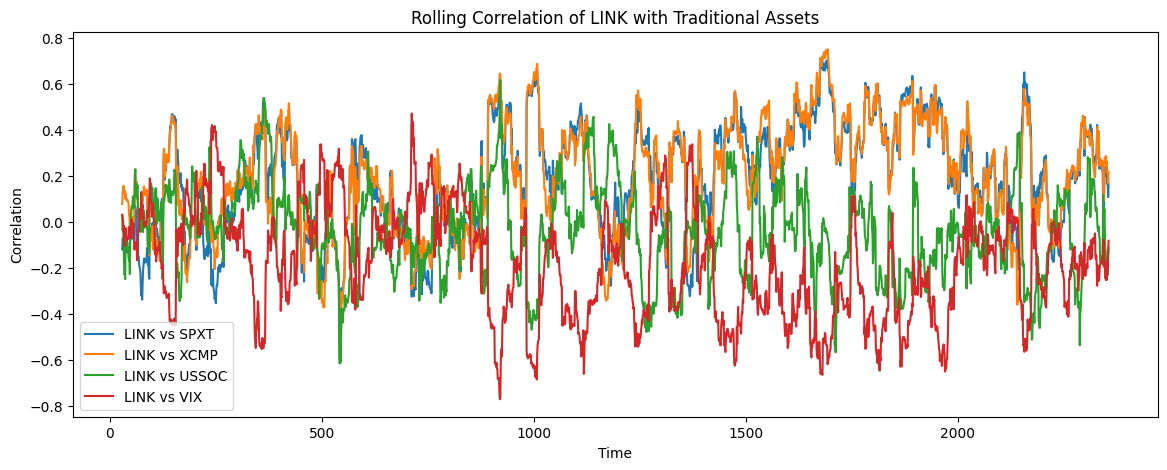

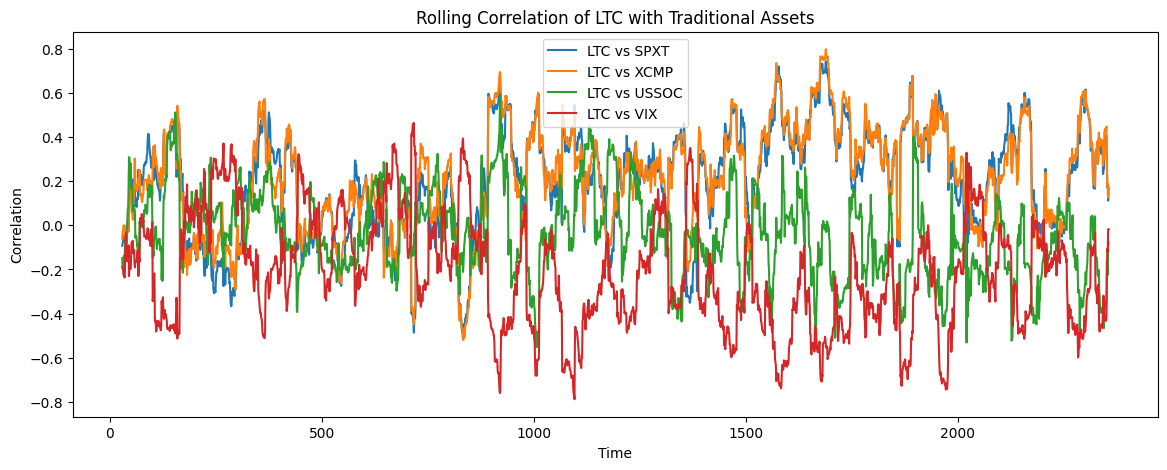

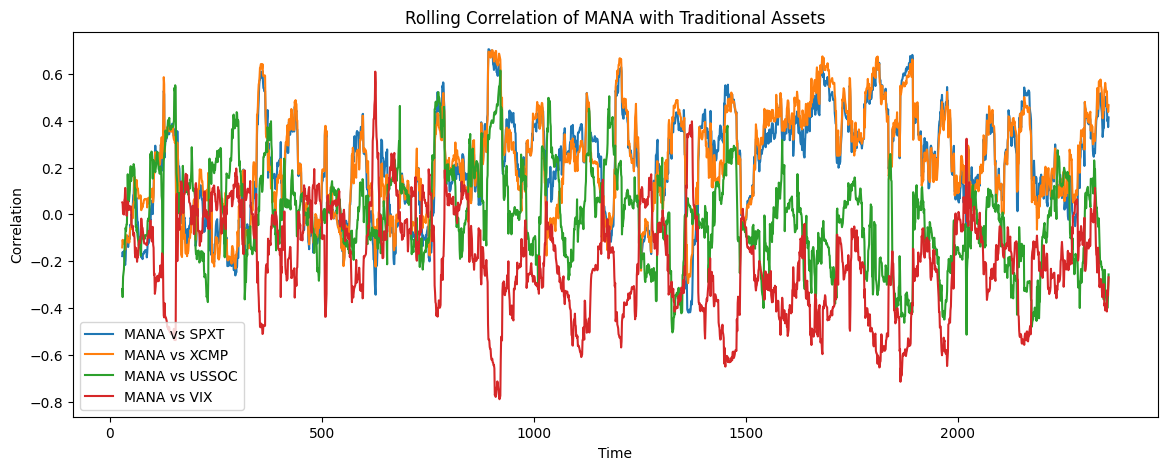

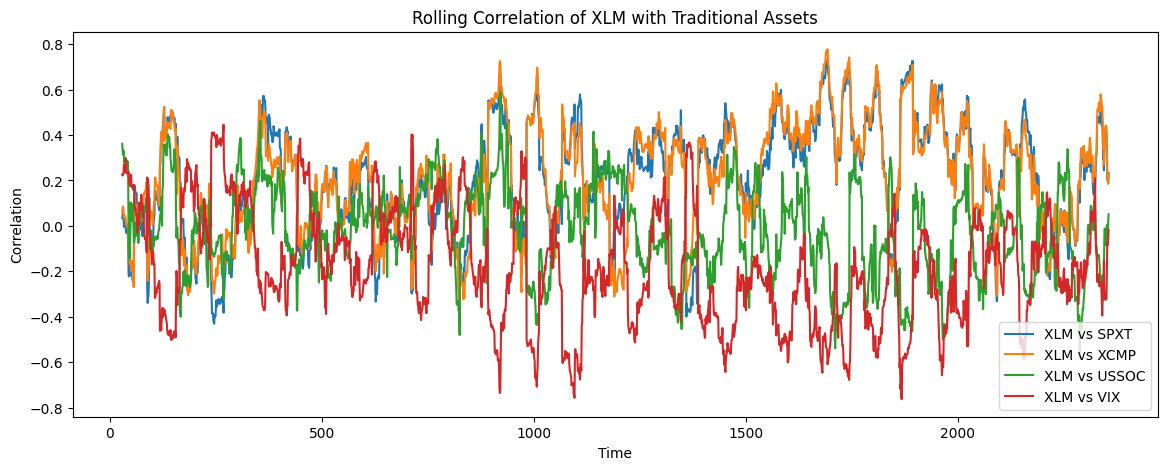

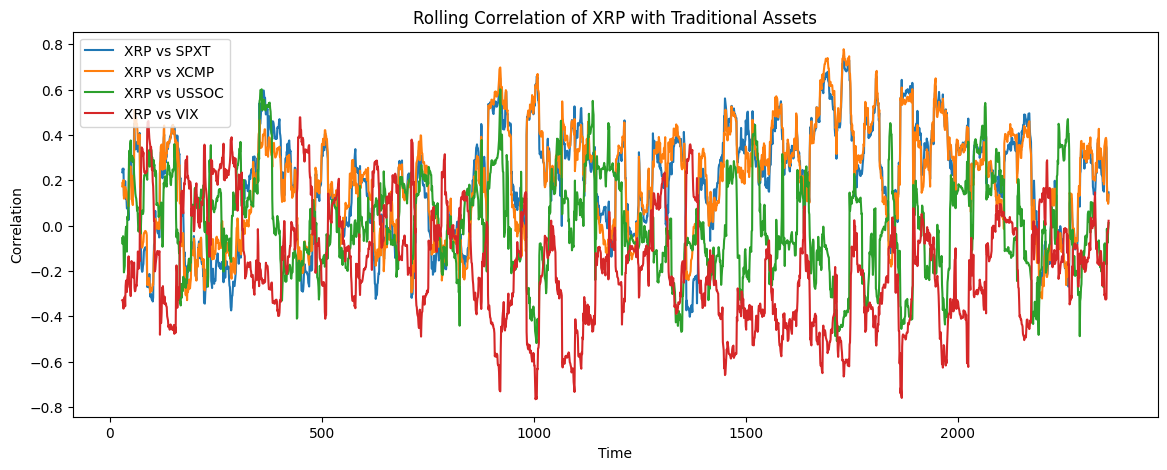

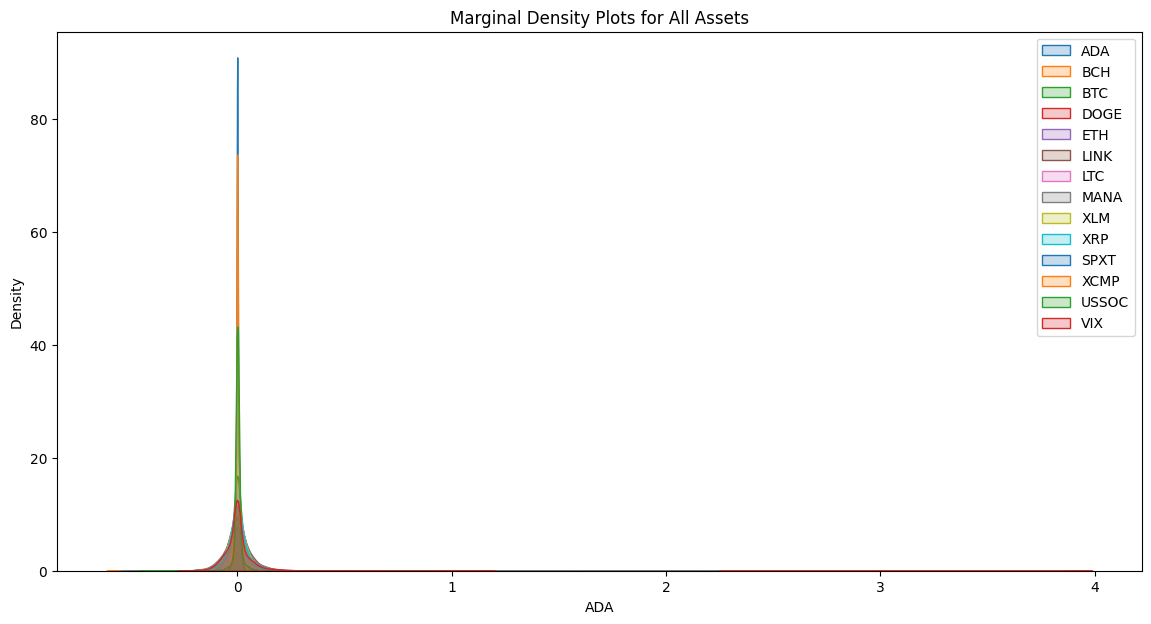

In [10]:
# Descriptive statistics
descriptive_stats = data.describe()

# Correlation heatmap
plt.figure(figsize=(14, 10))
correlation_matrix = data.drop(columns='time').corr()  # Drop the 'time' column for correlation
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


# Rolling correlations for crypto and traditional assets
window_size = 30  # 30 days rolling window

# Iterate over each cryptocurrency
for crypto in ['ADA', 'BCH', 'BTC', 'DOGE', 'ETH', 'LINK', 'LTC', 'MANA', 'XLM', 'XRP']:
    plt.figure(figsize=(14, 5))
    # Iterate over each traditional asset
    for trad in ['SPXT', 'XCMP', 'USSOC', 'VIX']:
        # Calculate rolling correlation
        rolling_corr = data[crypto].rolling(window=window_size).corr(data[trad])
        # Ensure the index is a flat array for plotting
        rolling_corr_index = rolling_corr.index.values.flatten()
        # Plot the rolling correlation
        plt.plot(rolling_corr_index, rolling_corr.values, label=f'{crypto} vs {trad}')
    plt.title(f'Rolling Correlation of {crypto} with Traditional Assets')
    plt.xlabel('Time')
    plt.ylabel('Correlation')
    plt.legend()
    plt.show()


# Marginal density plots for each asset
plt.figure(figsize=(14, 7))
for column in data.columns[1:]:  # Skipping 'time' column
    sns.kdeplot(data[column].dropna(), fill=True, label=column)  # Drop NA values for kde plot
plt.title('Marginal Density Plots for All Assets')
plt.legend()
plt.show()


In [12]:
descriptive_stats

,time,ADA,BCH,BTC,DOGE,ETH,LINK,LTC,MANA,XLM,XRP,SPXT,XCMP,USSOC,VIX
count,2357,2357.000000,2357.000000,2357.000000,2357.000000,2357.000000,2357.000000,2357.000000,2357.000000,2357.000000,2357.000000,2357.000000,2357.000000,2357.000000,2357.000000
mean,2020-12-23 00:00:00,0.003617,0.002577,0.001889,0.005301,0.002214,0.003892,0.001615,0.005333,0.002936,0.002351,0.000404,0.000485,0.001163,0.002414
min,2017-10-02 00:00:00,-0.416604,-0.561220,-0.381176,-0.381441,-0.434196,-0.446130,-0.372634,-0.481355,-0.336443,-0.416219,-0.119800,-0.123200,-0.438740,-0.233740
25%,2019-05-14 00:00:00,-0.027778,-0.024771,-0.014421,-0.023272,-0.019603,-0.032381,-0.024653,-0.034483,-0.025709,-0.022231,-0.001530,-0.001930,0.000000,-0.026140
50%,2020-12-23 00:00:00,0.000395,-0.000187,0.000936,-0.000402,0.000782,0.001545,0.000291,0.000000,0.000117,0.000144,0.000000,0.000000,0.000000,0.000000
75%,2022-08-04 00:00:00,0.027723,0.024345,0.017658,0.020976,0.024600,0.034688,0.025303,0.034521,0.024521,0.021583,0.003480,0.004910,0.002810,0.014180
max,2024-03-15 00:00:00,1.368108,2.000324,0.225515,3.923036,0.279043,0.626957,0.531276,2.184411,0.914894,0.855803,0.093940,0.093540,0.498210,1.155980
std,NaN,0.071039,0.078500,0.037976,0.106470,0.047708,0.068262,0.053650,0.098022,0.065904,0.064163,0.010491,0.012477,0.031419,0.070820


## Question 1.a

For this analysis, log returns should be used. The marginal distributions of crypto assets typically exhibit high kurtosis and skewness, suggesting a non-normal distribution. Log returns, which normalize and stabilize variance, are more suitable for the statistical models used in risk-based portfolio optimization, particularly when dealing with the high volatility of cryptocurrencies. This choice aligns with Meucci's insights on the appropriateness of log returns for multiperiod investment horizons and assets with volatile behaviors.

## 2) Outliers

### (with linear returns, just for info)

In [13]:
# Identify potential outliers
potential_outliers = data[(np.abs(data - data.mean()) > (3 * data.std())).any(axis=1)]
print(potential_outliers)

           time       ADA       BCH       BTC      DOGE       ETH      LINK  \
3    2017-10-05 -0.016903 -0.004159  0.024363 -0.006903  0.011348  0.033163   
4    2017-10-06 -0.140799  0.025370  0.011686  0.016882  0.045222  0.155556   
5    2017-10-07  0.124932 -0.008587  0.014609  0.017578  0.009503 -0.009615   
10   2017-10-12  0.169552 -0.012066  0.126118  0.014479  0.000099 -0.016700   
11   2017-10-13  0.272865  0.029487  0.037669 -0.029496  0.112054 -0.018342   
...         ...       ...       ...       ...       ...       ...       ...   
2090 2023-06-23  0.022751  0.365290  0.027183  0.041177  0.011269  0.091873   
2097 2023-06-30  0.042530  0.201066  0.000785  0.047950  0.044026  0.071125   
2110 2023-07-13  0.234256 -0.028242  0.035891  0.082859  0.071545  0.140435   
2343 2024-03-02  0.030274  0.585245 -0.006293  0.018638 -0.003565  0.067797   
2352 2024-03-11  0.080580  0.058020  0.044511  0.068702  0.047372 -0.019807   

           LTC      MANA       XLM       XRP     SP

/tmp/ipykernel_115/3541802309.py:2: PerformanceWarning: Adding/subtracting object-dtype array to DatetimeArray not vectorized.
  potential_outliers = data[(np.abs(data - data.mean()) > (3 * data.std())).any(axis=1)]


In [23]:
import numpy as np

# Calculate the IQR for each column except 'time' and identify outliers
Q1 = data.iloc[:, 1:].quantile(0.25)
Q3 = data.iloc[:, 1:].quantile(0.75)
IQR = Q3 - Q1
outliers = (data.iloc[:, 1:] < (Q1 - 3 * IQR)) | (data.iloc[:, 1:] > (Q3 + 3 * IQR))

# Calculate the total number of outliers identified
total_outliers = outliers.sum().sum()  # Summing up all True values for outliers

# Handle outliers: Replace them with NaN for columns other than 'time'
data_cleaned = data.copy()
data_cleaned.iloc[:, 1:] = data.iloc[:, 1:].mask(outliers)

# Fill NaN values using forward fill, then backward fill for any remaining at the start
data_cleaned.fillna(method='ffill', inplace=True)
data_cleaned.fillna(method='bfill', inplace=True)

# Print the total number of outliers
print("Total number of outliers identified:", total_outliers)


outliers


Total number of outliers identified: 1361


,ADA,BCH,BTC,DOGE,ETH,LINK,LTC,MANA,XLM,XRP,SPXT,XCMP,USSOC,VIX
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False,False,False
4,False,False,False,False,False,False,False,True,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2352,False,False,False,False,False,False,True,False,False,True,False,False,False,False
2353,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2354,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2355,False,False,False,False,False,False,False,False,False,False,False,False,False,False


We conducted outlier detection using two distinct statistical methods due to the unique characteristics of financial data, especially in highly volatile markets like those of cryptocurrencies.

Standard Deviation Method: The first approach involved identifying outliers as those data points lying beyond three standard deviations from the mean. While commonly used in many fields for outlier detection, this method proved overly sensitive for our dataset. It flagged a large number of data points as outliers, which upon further examination, were within plausible ranges for cryptocurrency returns. This high sensitivity is attributed to the large standard deviations characteristic of these markets, suggesting that the method might not be suitable for data with high volatility.

Interquartile Range (IQR) Method: Given the limitations observed with the standard deviation approach, we shifted to the IQR method. The IQR technique is less affected by extreme values and provides a more robust measure for identifying outliers in skewed distributions. Initially, a commonly used multiplier of 1.5 was applied to the IQR to define the outliers, which still resulted in a high number of outliers. Adjusting the multiplier to 3 significantly reduced the count to 1361 outliers, offering a more reasonable quantification (relatively to our original dataset size) that reflects true anomalous behaviors without discarding legitimate data variations.

Handling Identified Outliers: After identifying outliers with the adjusted IQR method, we handled these by initially replacing them with NaN values to prevent any distortion in the subsequent analysis. To maintain the continuity and integrity of our time series data, these NaN values were then addressed using forward filling (ffill), which propagates the last valid observation forward. Where forward filling was insufficient (e.g., at the start of the data series), backward filling (bfill) was employed to ensure no data point was left unfilled. This approach helps in preserving the temporal structure of the data while minimizing the impact of extreme value fluctuations.



### with log returns

In [25]:

# Calculate log returns for all columns except 'time'
data_log_returns = np.log1p(data.set_index('time'))

# Calculate the IQR for log returns
Q1_log = data_log_returns.quantile(0.25)
Q3_log = data_log_returns.quantile(0.75)
IQR_log = Q3_log - Q1_log

# Identify outliers using the IQR method for log returns
outliers_log = (data_log_returns < (Q1_log - 3 * IQR_log)) | (data_log_returns > (Q3_log + 3 * IQR_log))

# Calculate the total number of outliers
total_outliers_log = outliers_log.sum().sum()

# Handle outliers by replacing them with NaN and then forward-filling
data_log_returns_masked = data_log_returns.mask(outliers_log)
data_log_returns_filled = data_log_returns_masked.fillna(method='ffill').fillna(method='bfill')

total_outliers_log, data_log_returns_filled.head()


(1335,
                  ADA       BCH       BTC      DOGE       ETH      LINK  \
 time                                                                     
 2017-10-02  0.027023  0.008227 -0.000402 -0.023508 -0.023771 -0.199933   
 2017-10-03  0.027023 -0.042999 -0.019997 -0.027003 -0.016989 -0.033863   
 2017-10-04  0.049156 -0.122394 -0.022390 -0.008837 -0.000446  0.126269   
 2017-10-05 -0.017047 -0.004168  0.024071 -0.006927  0.011284  0.032625   
 2017-10-06 -0.151753  0.025053  0.011618  0.016741  0.044229  0.144581   
 
                  LTC      MANA       XLM       XRP      SPXT      XCMP  \
 time                                                                     
 2017-10-02 -0.027941 -0.227003 -0.064779 -0.025281  0.003872  0.003195   
 2017-10-03 -0.021625  0.153953 -0.046447  0.000984  0.002198  0.002377   
 2017-10-04 -0.017994 -0.156027 -0.049556  0.048954  0.001309  0.000600   
 2017-10-05  0.008166 -0.065785 -0.049556  0.108634  0.005803  0.007750   
 2017-10-06  0.0

The results are almost identical ??
probably due to the high volatility and the heavy tails
### (je dois reverifier la 1ere question)

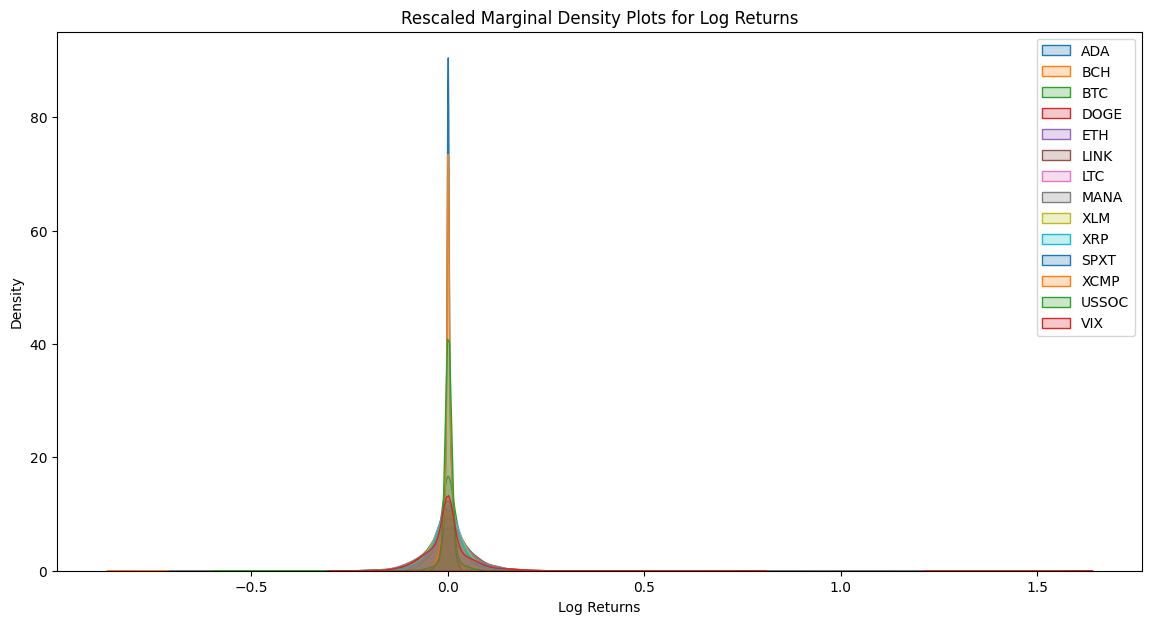

Skewness of Log Returns:
USSOC   -5.381134
SPXT    -0.938417
ETH     -0.913266
BTC     -0.874943
XCMP    -0.701816
LINK    -0.063058
LTC     -0.033353
BCH      1.034068
XRP      1.183144
XLM      1.424004
ADA      1.712513
VIX      1.819097
MANA     1.876837
DOGE     5.291092
dtype: float64

Kurtosis of Log Returns:
LINK       7.096355
LTC        9.881257
ETH       11.354044
XCMP      12.018778
BTC       13.122109
VIX       14.133608
XLM       15.967160
XRP       19.222877
SPXT      22.430946
ADA       24.094635
MANA      29.438379
BCH       40.428361
DOGE     107.715506
USSOC    120.437470
dtype: float64


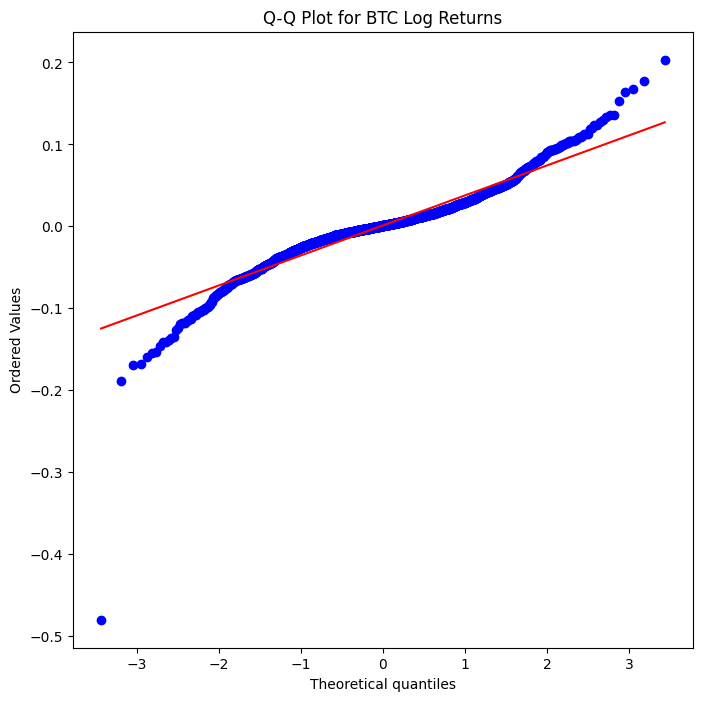

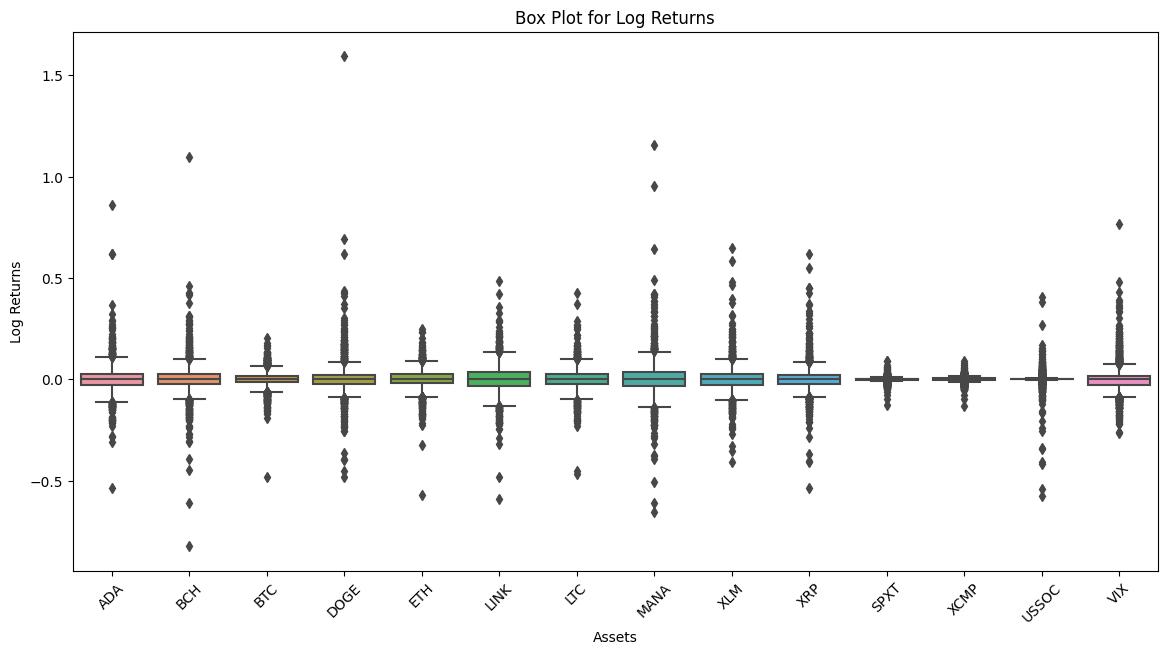

In [28]:
from scipy import stats

# First, let's rescale the marginal density plots with log returns
plt.figure(figsize=(14, 7))
for column in log_returns.columns:
    sns.kdeplot(log_returns[column].dropna(), fill=True, label=column)
plt.title('Rescaled Marginal Density Plots for Log Returns')
plt.xlabel('Log Returns')
plt.ylabel('Density')
plt.legend()
plt.show()

# Now, we'll conduct statistical tests for skewness and kurtosis to quantify the shape of the distribution.
skewness = log_returns.skew().sort_values()
kurtosis = log_returns.kurtosis().sort_values()

# Display skewness and kurtosis values
print("Skewness of Log Returns:")
print(skewness)
print("\nKurtosis of Log Returns:")
print(kurtosis)

# Next, we'll create a Q-Q plot for one of the assets to visually inspect its distribution against a normal distribution.
# Here we use BTC as an example. You would repeat this for other assets or iterate over all.
plt.figure(figsize=(8, 8))
stats.probplot(log_returns['BTC'].dropna(), dist="norm", plot=plt)
plt.title('Q-Q Plot for BTC Log Returns')
plt.show()

# Lastly, we'll plot a box plot to visualize the spread and outliers in the log returns.
plt.figure(figsize=(14, 7))
sns.boxplot(data=log_returns)
plt.title('Box Plot for Log Returns')
plt.xlabel('Assets')
plt.ylabel('Log Returns')
plt.xticks(rotation=45)
plt.show()


## Total returns (question 1.c )

Does it Matter in General?
Yes, significantly because of 2 aspects:

- Accuracy in Returns: Total return indices, which include dividends, provide a fuller picture of the true returns an investor would receive, as they reflect both price changes and income from dividends.
- Benchmarking and Relevance: They offer a more realistic benchmark for assessing investment performance and are particularly relevant for investors who reinvest dividends.

For the Risk-Based Portfolio Optimizations in This Study?
Indeed, it is also crucial:

- Impact on Risk and Reward: The inclusion of dividends affects both the risk and return calculations, altering the risk-return profile used in portfolio optimizations.
- Influence on Diversification: These indices might show different behaviors compared to price-only indices, particularly affecting diversification strategies due to changes in asset correlations.
- Optimization Outcomes: Total return indices can shift the efficient frontier upward, leading to different optimal portfolio compositions and weightings.

In a nutshell, using total return indices like SPXT and XCMP is essential for realistic and effective portfolio management, especially in a study focusing on risk-based optimization. This approach ensures that all components of returns are considered, facilitating more accurate decision-making in portfolio construction and management.

## Question 1.d

Observation and Impact:
For traditional assets like SPXT and XCMP, zero returns over weekends are noted because these markets are closed, whereas cryptocurrencies trade 24/7, leading to non-zero returns every day. This discrepancy can distort correlation calculations between traditional and crypto assets, as weekends introduce artificial stability into the returns of traditional assets.

This is a problem for statistical analyses, especially when calculating correlations or conducting any comparative time series analysis. The zero returns can artificially lower the volatility and skew the correlation metrics between traditional and crypto assets.

Suggested Solution:

- Synchronize the Data: One approach is to adjust the dataset so that returns for traditional assets are only calculated on days when those markets are open (i.e., exclude weekends). Alternatively, calculate weekly returns instead of daily returns to ensure comparability across all assets.
- Use Imputation: For correlation purposes and other time-sensitive analyses, impute weekend returns for traditional assets using interpolation or forward-filling from the nearest non-zero data point. This maintains data continuity without introducing significant bias.
This methodological adjustment helps align the data temporally, providing more accurate and meaningful analytical outcomes, particularly in mixed-asset portfolios like those including both traditional and crypto assets.